In [9]:
# Step 1: Imports with updated modularized parsing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# Use the same file path as in the first cell
results_cocoa_boolq = pd.read_csv("output/polygraph/CoCoaMSP/boolq_llama_3.2_1b_instruct_CocoaMSP_500.csv")
results_cocoa_boolq

,question,title,answer,passage,context,input_text,model_answer,uncertainty_score,ground_truth,match
0,is systemic functional grammar a contemporary ...,Systemic functional grammar,True,Systemic functional grammar (SFG) is a form of...,Systemic functional grammar (SFG) is a form of...,Passage: Systemic functional grammar (SFG) is ...,"?\nAnswer: No, it is not. It is an older theor...",8.915150,True,False
1,is season 7 the final season of true blood,True Blood (season 7),True,The seventh and final season of the HBO supern...,The seventh and final season of the HBO supern...,Passage: The seventh and final season of the H...,"?\nAnswer: yes, season 7 is the final season o...",1.675704,True,False
2,are there any of the temptations still living,Otis Williams,True,Williams is best known as the founder and last...,Williams is best known as the founder and last...,Passage: Williams is best known as the founder...,"today?\nAnswer: yes, there are still some memb...",14.747940,True,False
3,does shaving your head make lice go away,Treatment of human head lice,True,Shaving the head or cutting the hair extremely...,Shaving the head or cutting the hair extremely...,Passage: Shaving the head or cutting the hair ...,"?\nAnswer: Yes, shaving your head can help con...",7.742023,True,False
4,does a turtle's shell grow with them,Turtle shell,True,The carapacial ridge has been found to play an...,The carapacial ridge has been found to play an...,Passage: The carapacial ridge has been found t...,"?\nAnswer: Yes, a turtle's shell grows with th...",12.729044,True,False
...,...,...,...,...,...,...,...,...,...,...
495,do you get overseas service bars for korea,Overseas Service Bar,True,19-28. Overseas service bars a. Authorized wea...,19-28. Overseas service bars a. Authorized wea...,Passage: 19-28. Overseas service bars a. Autho...,", Vietnam, and the Dominican Republic?\nAnswer...",8.795858,True,False
496,does golden goal apply in the world cup 2018,Golden goal,False,"In February 2004, the IFAB announced that afte...","In February 2004, the IFAB announced that afte...","Passage: In February 2004, the IFAB announced ...","?\nAnswer: No, the golden goal is not used in ...",5.467244,False,False
497,is it safe to swim in brisbane river,Brisbane River,False,"Environmentally, the river is in a poor condit...","Environmentally, the river is in a poor condit...","Passage: Environmentally, the river is in a po...","?\nAnswer: No, it is not safe to swim in the B...",2.639367,False,False
498,is a certified abstract of birth a birth certi...,Birth certificate,True,The U.S. State Department has paid close atten...,The U.S. State Department has paid close atten...,Passage: The U.S. State Department has paid cl...,"?\nAnswer: No, a certified abstract of birth i...",19.830114,True,False


In [15]:
import re

# Extract yes/no from model_answer and convert to boolean
def extract_yes_no(text):
    # Search for first occurrence of yes or no (case insensitive)
    match = re.search(r'\b(yes|no)\b', str(text).lower())
    if match:
        return match.group(1) == 'yes'
    return None

# Extract uncertainty value from uncertainty_score
def extract_uncertainty(uncertainty_obj):
    # Convert to string and extract the number using regex
    uncertainty_str = str(uncertainty_obj)
    match = re.search(r'uncertainty=([\d.]+)', uncertainty_str)
    if match:
        return float(match.group(1))
    return None

# Create answer_parsed column
results_cocoa_boolq['answer_parsed'] = results_cocoa_boolq['model_answer'].apply(extract_yes_no)

# Re-evaluate match column based on answer_parsed vs answer
results_cocoa_boolq['match'] = results_cocoa_boolq['answer_parsed'] == results_cocoa_boolq['answer']

# Display the updated dataframe
results_cocoa_boolq[['question', 'answer', 'model_answer', 'answer_parsed', 'uncertainty_score', 'match']].head(10)

,question,answer,model_answer,answer_parsed,uncertainty_score,match
0,is systemic functional grammar a contemporary ...,True,"?\nAnswer: No, it is not. It is an older theor...",False,8.915150,False
1,is season 7 the final season of true blood,True,"?\nAnswer: yes, season 7 is the final season o...",True,1.675704,True
2,are there any of the temptations still living,True,"today?\nAnswer: yes, there are still some memb...",True,14.747940,True
3,does shaving your head make lice go away,True,"?\nAnswer: Yes, shaving your head can help con...",True,7.742023,True
4,does a turtle's shell grow with them,True,"?\nAnswer: Yes, a turtle's shell grows with th...",True,12.729044,True
5,does dr house die in the last episode,False,"of house M.D.?\nThe answer is: yes, House dies...",True,7.697168,False
6,is hair bleach the same as regular bleach,True,"?\nNo, hair bleach is not the same as regular ...",False,10.666144,False
7,did zidane won la liga as a coach,True,"?\nAnswer: yes, he won the la liga title as a ...",True,8.590942,True
8,has anyone won all 4 majors in the same year,True,"?\nAnswer: No, Bobby Jones won all 4 majors in...",False,7.087783,False
9,the kingdom of vijayanagar was found by two br...,True,", harihara i and bukka raya i of the sangama d...",True,6.695131,True


In [16]:
# Calculate the accuracy (match rate)
accuracy = results_cocoa_boolq['match'].mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 65.00%


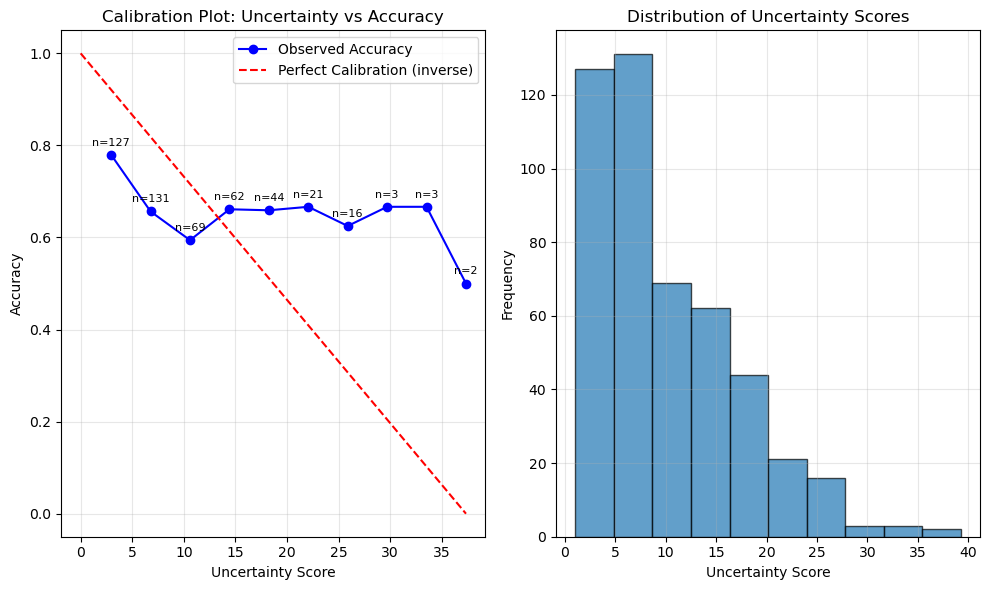

Correlation between uncertainty and correctness: 0.082
Mean uncertainty for correct answers: 9.78
Mean uncertainty for incorrect answers: 11.02


In [17]:
# Create calibration plot for uncertainty vs correctness
plt.figure(figsize=(10, 6))

# Remove rows where answer_parsed is None for this analysis
clean_data = results_cocoa_boolq.dropna(subset=['answer_parsed'])

# Create bins for uncertainty scores
n_bins = 10
bin_edges = np.linspace(clean_data['uncertainty_score'].min(), clean_data['uncertainty_score'].max(), n_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate accuracy for each bin
bin_accuracies = []
bin_counts = []

for i in range(n_bins):
    # Find data points in this bin
    mask = (clean_data['uncertainty_score'] >= bin_edges[i]) & (clean_data['uncertainty_score'] < bin_edges[i+1])
    if i == n_bins - 1:  # Include right edge for last bin
        mask = (clean_data['uncertainty_score'] >= bin_edges[i]) & (clean_data['uncertainty_score'] <= bin_edges[i+1])
    
    bin_data = clean_data[mask]
    
    if len(bin_data) > 0:
        accuracy = bin_data['match'].mean()
        bin_accuracies.append(accuracy)
        bin_counts.append(len(bin_data))
    else:
        bin_accuracies.append(0)
        bin_counts.append(0)

# Create the calibration plot
plt.subplot(1, 2, 1)
plt.plot(bin_centers, bin_accuracies, 'bo-', label='Observed Accuracy')
plt.plot([0, bin_centers.max()], [1, 0], 'r--', label='Perfect Calibration (inverse)')
plt.xlabel('Uncertainty Score')
plt.ylabel('Accuracy')
plt.title('Calibration Plot: Uncertainty vs Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Add bin counts as text
for i, (x, y, count) in enumerate(zip(bin_centers, bin_accuracies, bin_counts)):
    if count > 0:
        plt.text(x, y + 0.02, f'n={count}', ha='center', fontsize=8)

# Create histogram of uncertainty distribution
plt.subplot(1, 2, 2)
plt.hist(clean_data['uncertainty_score'], bins=n_bins, alpha=0.7, edgecolor='black')
plt.xlabel('Uncertainty Score')
plt.ylabel('Frequency')
plt.title('Distribution of Uncertainty Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Correlation between uncertainty and correctness: {clean_data['uncertainty_score'].corr(-clean_data['match'].astype(int)):.3f}")
print(f"Mean uncertainty for correct answers: {clean_data[clean_data['match']]['uncertainty_score'].mean():.2f}")
print(f"Mean uncertainty for incorrect answers: {clean_data[~clean_data['match']]['uncertainty_score'].mean():.2f}")

C:\Users\Chris\AppData\Local\Temp\ipykernel_22480\1951897996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['answer_parsed'] = clean_data['answer_parsed'].astype(bool)


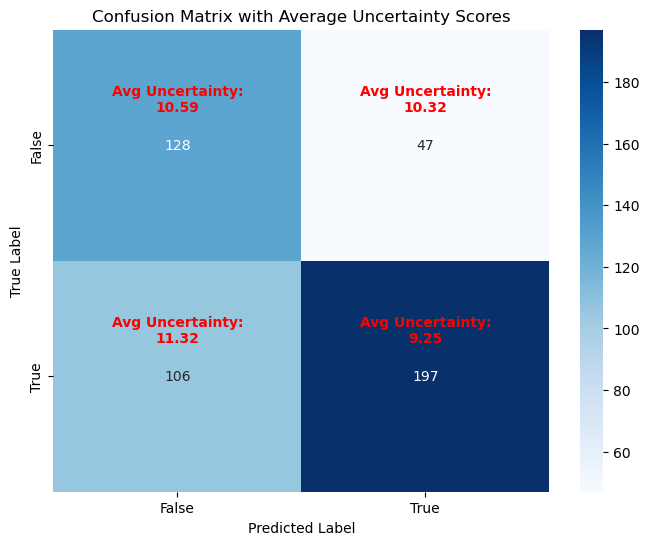

True Negatives (TN): 128 - Avg Uncertainty: 10.59
False Positives (FP): 47 - Avg Uncertainty: 10.32
False Negatives (FN): 106 - Avg Uncertainty: 11.32
True Positives (TP): 197 - Avg Uncertainty: 9.25


In [21]:
from sklearn.metrics import confusion_matrix

# Convert answer_parsed to boolean type
clean_data['answer_parsed'] = clean_data['answer_parsed'].astype(bool)

# Create confusion matrix
y_true = clean_data['answer']
y_pred = clean_data['answer_parsed']

cm = confusion_matrix(y_true, y_pred)

# Calculate average uncertainty for each quadrant
tn_uncertainty = clean_data[(clean_data['answer'] == False) & (clean_data['answer_parsed'] == False)]['uncertainty_score'].mean()
fp_uncertainty = clean_data[(clean_data['answer'] == False) & (clean_data['answer_parsed'] == True)]['uncertainty_score'].mean()
fn_uncertainty = clean_data[(clean_data['answer'] == True) & (clean_data['answer_parsed'] == False)]['uncertainty_score'].mean()
tp_uncertainty = clean_data[(clean_data['answer'] == True) & (clean_data['answer_parsed'] == True)]['uncertainty_score'].mean()

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])

# Add uncertainty annotations
plt.text(0.5, 0.3, f'Avg Uncertainty:\n{tn_uncertainty:.2f}', 
         ha='center', va='center', fontsize=10, color='red', weight='bold')
plt.text(1.5, 0.3, f'Avg Uncertainty:\n{fp_uncertainty:.2f}', 
         ha='center', va='center', fontsize=10, color='red', weight='bold')
plt.text(0.5, 1.3, f'Avg Uncertainty:\n{fn_uncertainty:.2f}', 
         ha='center', va='center', fontsize=10, color='red', weight='bold')
plt.text(1.5, 1.3, f'Avg Uncertainty:\n{tp_uncertainty:.2f}', 
         ha='center', va='center', fontsize=10, color='red', weight='bold')

plt.title('Confusion Matrix with Average Uncertainty Scores')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print detailed statistics
print(f"True Negatives (TN): {cm[0,0]} - Avg Uncertainty: {tn_uncertainty:.2f}")
print(f"False Positives (FP): {cm[0,1]} - Avg Uncertainty: {fp_uncertainty:.2f}")
print(f"False Negatives (FN): {cm[1,0]} - Avg Uncertainty: {fn_uncertainty:.2f}")
print(f"True Positives (TP): {cm[1,1]} - Avg Uncertainty: {tp_uncertainty:.2f}")